In [1]:
from module_behavioral.dataloader import DataLoader
from module_behavioral.analysis import reduce_dimensions, emotion_colors, sighted_blind_similarity
from module_behavioral.utility import set_significance
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kendalltau,pearsonr
import seaborn as sns

In [2]:
## load emotion and color data from experiment five
d = DataLoader(context=5, location='../data/processeddata/5/')
d.load_color()
d.load_emotion()
d.load_emotion_color_association()

In [3]:
## load emotion and color data from experiment six
d2 = DataLoader(context=6, location='../data/processeddata/6/')
d2.load_color()
d2.load_emotion()
d2.load_emotion_color_association()

In [4]:
## reduce the similarity matrix to 2 dimensions
color_embedding_blind = reduce_dimensions(d.average_color_matrix, 2)
emotion_embedding_blind = reduce_dimensions(d.average_emotion_matrix, 2)

color_embedding_sighted = reduce_dimensions(d2.average_color_matrix, 2)
emotion_embedding_sighted = reduce_dimensions(d2.average_emotion_matrix, 2)

In [5]:
## set matplotlib style
plt.style.use('./module_behavioral/figures.style')

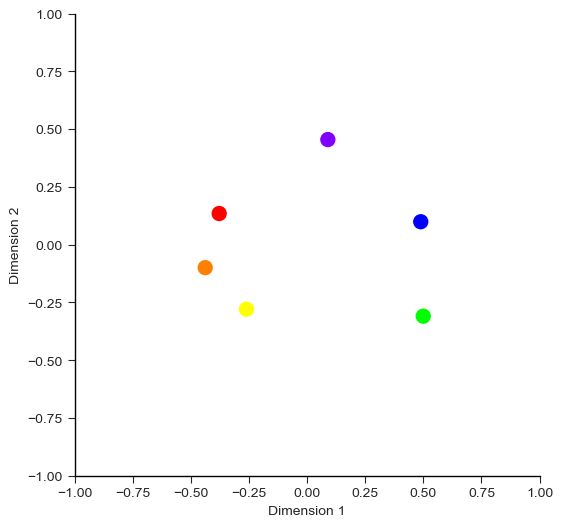

In [6]:
## Figure 6A.
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(color_embedding_blind[:, 0], color_embedding_blind[:, 1], c=d.color_values)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
plt.savefig('../figures/6A.svg', dpi=600)

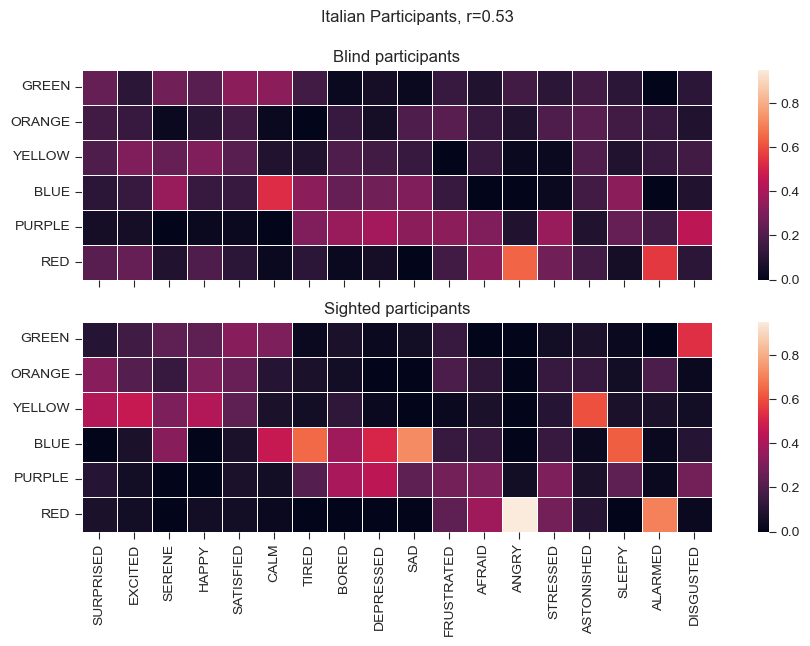

In [19]:
# FIG 6B
v = kendalltau(d.average_emotion_color_ranking_matrix, d2.average_emotion_color_ranking_matrix)
fig, ax = plt.subplots(figsize=(12,6),nrows=2,sharex=True,sharey=True)
sns.heatmap(d.average_emotion_color_ranking_matrix.T,ax=ax[0],cbar=True,yticklabels=d.color, xticklabels=d.emotion,linewidths=0.5,edgecolor='k',vmax=0.95,vmin=0,square=True)
ax[0].set_title('Blind participants')
sns.heatmap(d2.average_emotion_color_ranking_matrix.T,ax=ax[1],cbar=True,yticklabels=d.color, xticklabels=d.emotion,linewidths=0.55,edgecolor='k',vmax=0.95,vmin=0,square=True)
ax[1].set_title('Sighted participants')
plt.suptitle('Italian Participants, r=%.2f'%(v[0]))
plt.savefig('../figures/6B.svg', dpi=600, bbox_inches='tight')

In [8]:
color_stability, emotion_color_stability = sighted_blind_similarity(color_embedding_sighted, d2.average_emotion_color_ranking_matrix, d.individual_color_matrix, d.individual_emotion_color_ranking_matrix)

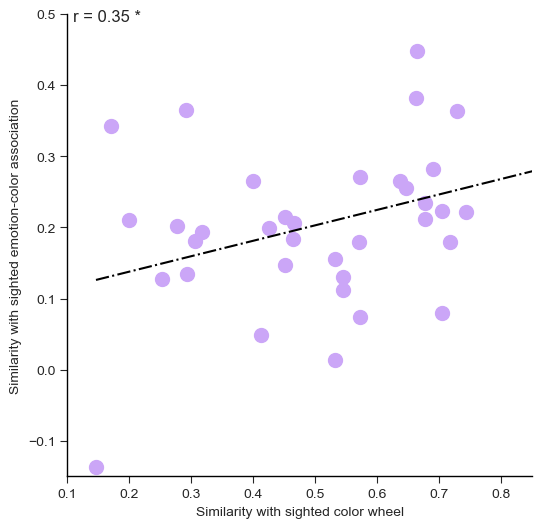

In [16]:
## Figure 6C
r,p = pearsonr(color_stability,emotion_color_stability)
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(color_stability, emotion_color_stability)

# fit a line
coef = np.polyfit(color_stability, emotion_color_stability, deg=1)
poly1d_fn = np.poly1d(coef)

plotx = np.linspace(np.min(color_stability),np.max(color_stability),15)
ax.plot(plotx,poly1d_fn(plotx),'k-.')

ax.set_xlabel('Similarity with sighted color wheel')
ax.set_ylabel('Similarity with sighted emotion-color association')
ax.text(0.11,0.49,'r = %.2f %s'%(r,set_significance(p)),fontdict={'size':12})

ax.set_xlim([0.1, 0.85])
ax.set_ylim([-0.15, 0.5])

plt.savefig('../figures/6C.svg', dpi=600)

In [10]:
colors = emotion_colors(color_embedding_blind, d.average_emotion_color_ranking_matrix, d.color_values)

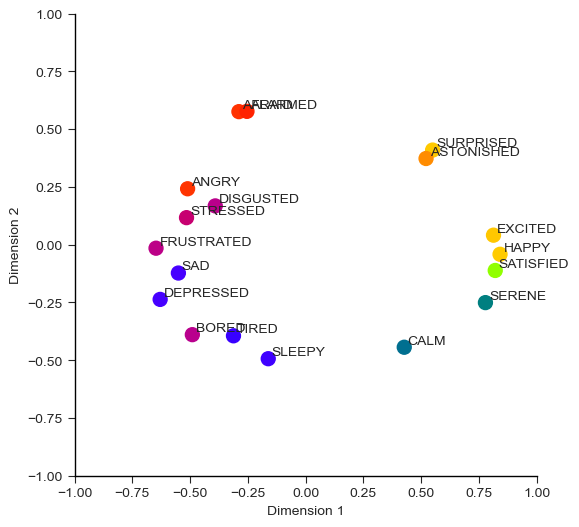

In [11]:
## Figure 6D.
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(emotion_embedding_blind[:, 0], emotion_embedding_blind[:, 1], c=colors)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

#annotate each point with emotion
ax.set_aspect('equal')

for i in range(0, len(d.emotion)):
    x = d.emotion[i]
    plt.annotate(str(x),
                 (emotion_embedding_blind[i, 0], emotion_embedding_blind[i, 1]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=10)
plt.savefig('../figures/6D.svg', dpi=600)